In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
pip install python-bidi


In [ ]:
pip install arabic_reshaper


In [ ]:
pip install unicodedata

ERROR: Could not find a version that satisfies the requirement unicodedata (from versions: none)
ERROR: No matching distribution found for unicodedata


In [ ]:
import os
import time
import re
import io
import math 
import unicodedata
import numpy as np
import tensorflow as tf
import arabic_reshaper
from string import digits
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from __future__ import absolute_import, division, print_function

'''
from __future__ import absolute_import, division, print_function

print(tf.__version__)
'''


'\nfrom __future__ import absolute_import, division, print_function\n\nprint(tf.__version__)\n'

In [ ]:
#!wget https://opus.nlpl.eu/download.php?f=OpenSubtitles/v2018/moses/ar-en.txt.zip 29m ready with name output_OpenSubtitles 
#ls
#!unzip ar-en.txt.zip
#ls
'''
https://opus.nlpl.eu/download.php?f=WikiMatrix/v1/moses/ar-en.txt.zip 1m

https://opus.nlpl.eu/download.php?f=QED/v2.0a/moses/ar-en.txt.zip 500k
https://opus.nlpl.eu/download.php?f=TED2013/v1.1/moses/ar-en.txt.zip 150k
https://opus.nlpl.eu/download.php?f=News-Commentary/v16/moses/ar-en.txt.zip 97k
https://opus.nlpl.eu/download.php?f=KDE4/v2/moses/ar-en.txt.zip 116k

https://opus.nlpl.eu/download.php?f=Tanzil/v1/moses/ar-en.txt.zip 187k

https://opus.nlpl.eu/download.php?f=Tatoeba/v2021-07-22/moses/ar-en.txt.zip 27900 ready with name output_Tatoeba
'''


'\nhttps://opus.nlpl.eu/download.php?f=WikiMatrix/v1/moses/ar-en.txt.zip 1m\n\nhttps://opus.nlpl.eu/download.php?f=QED/v2.0a/moses/ar-en.txt.zip 500k\nhttps://opus.nlpl.eu/download.php?f=TED2013/v1.1/moses/ar-en.txt.zip 150k\nhttps://opus.nlpl.eu/download.php?f=News-Commentary/v16/moses/ar-en.txt.zip 97k\nhttps://opus.nlpl.eu/download.php?f=KDE4/v2/moses/ar-en.txt.zip 116k\n\nhttps://opus.nlpl.eu/download.php?f=Tanzil/v1/moses/ar-en.txt.zip 187k\n\nhttps://opus.nlpl.eu/download.php?f=Tatoeba/v2021-07-22/moses/ar-en.txt.zip 27900 ready with name output_Tatoeba\n'

In [ ]:
#!wget https://opus.nlpl.eu/download.php?f=Tanzil/v1/moses/ar-en.txt.zip


--2022-02-28 22:03:58--  https://opus.nlpl.eu/download.php?f=Tanzil/v1/moses/ar-en.txt.zip
Resolving opus.nlpl.eu (opus.nlpl.eu)... 193.166.25.9
Connecting to opus.nlpl.eu (opus.nlpl.eu)|193.166.25.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://object.pouta.csc.fi/OPUS-Tanzil/v1/moses/ar-en.txt.zip [following]
--2022-02-28 22:03:59--  https://object.pouta.csc.fi/OPUS-Tanzil/v1/moses/ar-en.txt.zip
Resolving object.pouta.csc.fi (object.pouta.csc.fi)... 86.50.254.18, 86.50.254.19
Connecting to object.pouta.csc.fi (object.pouta.csc.fi)|86.50.254.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25547090 (24M) [application/zip]
Saving to: ‘download.php?f=Tanzil%2Fv1%2Fmoses%2Far-en.txt.zip’

download.php?f=Tanz 100%[===================>]  24.36M  10.7MB/s    in 2.3s    

2022-02-28 22:04:02 (10.7 MB/s) - ‘download.php?f=Tanzil%2Fv1%2Fmoses%2Far-en.txt.zip’ saved [25547090/25547090]



In [ ]:
#!unzip download.php?f=Tanzil%2Fv1%2Fmoses%2Far-en.txt.zip


Archive:  download.php?f=Tanzil%2Fv1%2Fmoses%2Far-en.txt.zip
  inflating: Tanzil.ar-en.ar         
  inflating: Tanzil.ar-en.en         
  inflating: Tanzil.ar-en.ids        
replace README? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
ls

 ara.txt
 checkpoint
'Copy of Copy of Copy of inputImages.ipynb'
 data/
 decoder.h5
 decoder.h6.data-00000-of-00001
 decoder.h6.index
 decoder.h7.data-00000-of-00001
 decoder.h7.index
 decoder.h8.data-00000-of-00001
 decoder.h8.index
'download.php?f=News-Commentary%2Fv16%2Fmoses%2Far-en.txt.zip'
'download.php?f=Tanzil%2Fv1%2Fmoses%2Far-en.txt.zip'
 encoder.h5
 encoder.h6.data-00000-of-00001
 encoder.h6.index
 encoder.h7.data-00000-of-00001
 encoder.h7.index
 encoder.h8.data-00000-of-00001
 encoder.h8.index
'KD homweork.ipynb'
'monticarlo taxi.ipynb'
'Our_code (1).ipynb'
 README
 session4_2021.ipynb
 Tanzil.ar-en.ar
 Tanzil.ar-en.en
 Tanzil.ar-en.ids
 Tatoeba.ar-en_ar.txt
 Tatoeba.ar-en_en.txt
 Tatoeba.ar-en.xml
 Tatoeba_output.txt
 taxi.ipynb
 taxi_problem-qlearning.ipynb
 training_checkpoints/
 Untitled
 Untitled0.ipynb
 Untitled10.ipynb
 Untitled11.ipynb
 Untitled12.ipynb
 Untitled13.ipynb
 Untitled14.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 Untitled4.ipynb
 Untitled

In [ ]:
import pandas as pd 
#https://www.geeksforgeeks.org/pandas-concat-function-in-python/

#merg bilingul data in one file


src_dat='Tatoeba.ar-en_ar.txt'
trg_dat='Tatoeba.ar-en_en.txt'

#src_dat='Tanzil.ar-en_ar.tZxt'
#trg_dat='Tanzil.ar-en_en.txt'
df1 = pd.read_csv(src_dat , sep='\n')
df2 = pd.read_csv(trg_dat , sep='\n')
df = pd.concat([df1,df2], axis=1,join="inner",ignore_index=True)
df.to_csv('Tatoeba_output.txt', sep='\t',index=False, header=False)

#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
#https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file


In [ ]:
#display(df)


In [ ]:
#view the parallel data
import pandas as pd 
data_path= 'ara.txt'
lines_raw= pd.read_table(data_path,names=['source','target'])
#print(len(lines_raw))
#lines_raw.sample(50)
lines_raw.head(50)


,source,target
0,Hi.,مرحبًا.
1,Run!,اركض!
2,Help!,النجدة!
3,Jump!,اقفز!
4,Stop!,قف!
5,Go on.,داوم.
6,Go on.,استمر.
7,Hello!,مرحباً.
8,Hurry!,تعجّل!
9,Hurry!,استعجل!


In [ ]:
#display(lines_raw)


In [ ]:
print(lines_raw.loc[27898].at['target']	)
print(lines_raw.loc[27898	].at['source']	)
print()
print(lines_raw.loc[1000		].at['target']	)
print(lines_raw.loc[1000		].at['source']	)
#151747

KeyError: ignored

In [ ]:
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')



def Prepare_clean_sentence(sentence):     #preprocessing
 
 # data word processing :  single sentence src or tr => Single clean and ready sentence 

    sentence=  unicode_to_ascii(sentence.lower().strip())
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z؀-ۿ?.!,¿]+", " ", sentence)
    sentence = sentence.rstrip().strip()  
    sentence=  '<start> ' + sentence + ' <end>'
    
    return sentence


In [ ]:
en_sentence = u"He will hire someone who speaks English.	"
ar_sentence = u" سيوظف شخصا يتحدث الإنجليزية ."
print(Prepare_clean_sentence(en_sentence))
print(Prepare_clean_sentence(ar_sentence))


<start> he will hire someone who speaks english . <end>
<start> سيوظف شخصا يتحدث الانجليزية . <end>


In [ ]:
def Read_and_Preprocess_dataset(data_path, num_samples):

   # start reading data and clear it and return pairs of sentences (src_Arabic_sentences, tar_English_sentences )

    lines = open(data_path, encoding='UTF-8-sig').read().strip().split('\n')   #utf-8-sig for Arabic sentences
    word_pairs= [[Prepare_clean_sentence (sentence) for sentence in line.split('\t')]  for line in lines[:num_samples]]
    print(len(lines))
   
    return zip(*word_pairs)

    
    #https://www.w3schools.com/python/ref_func_zip.asp


In [ ]:
# previously was display and see data
#here we really start
sample_size=60000
data_path= ''Tatoeba_output.txt''
target, source = Read_and_Preprocess_dataset(data_path, None)
print(source[-1])
print(target[-1])
type(target)

27899
<start> tom sent mary to boston . <end>
<start> توم ارسل ماري الى بوسطن . <end>


tuple

In [ ]:
def tokenize(lang):

  # " tokens"
  
    lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    lang_tokenizer.fit_on_texts(lang)
    tensor = lang_tokenizer.texts_to_sequences(lang)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,padding='post')
    
    return tensor, lang_tokenizer


#print(len(tensor[0]))
#print(lang_tokenizer.word_counts)
#print(lang_tokenizer.document_count)
#print(lang_tokenizer.word_index)
#print(lang_tokenizer.word_docs)
#print(lang_tokenizer.index_word)

#https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/


In [ ]:
def load_dataset(data_path, num_samples=None):

    # start the Preprocess data task => ready data to process
  
    input_src_lang , output_targ_lang = Read_and_Preprocess_dataset(data_path , num_samples)

    input_tensor, inp_lang_tokenizer = tokenize(input_src_lang)
    target_tensor, targ_lang_tokenizer = tokenize(output_targ_lang)

    return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer

In [ ]:
sample_size=10800
data_path='ara.txt'
(input_tensor ,target_tensor, inp_lang , targ_lang ) = load_dataset(data_path , sample_size)

# Calculate max_length of the target tensors
max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]
'''
max_target_length= max(len(t) for t in  target_tensor)
print(max_target_length)
max_source_length= max(len(t) for t in  source_tensor)
print(max_source_length)
'''


10742


'\nmax_target_length= max(len(t) for t in  target_tensor)\nprint(max_target_length)\nmax_source_length= max(len(t) for t in  source_tensor)\nprint(max_source_length)\n'

In [ ]:
#print(lang_tokenizer.index_word)
print(f'[INFO] Max length of target: {max_length_targ}')
print(f'[INFO] Max length of input: {max_length_inp}')

[INFO] Max length of target: 39
[INFO] Max length of input: 42


In [ ]:
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Creating training and validation sets using an 80-20 split
(input_tensor_train,input_tensor_val,target_tensor_train,target_tensor_val) = train_test_split(input_tensor,target_tensor,test_size=0.20)
(input_tensor_val,input_tensor_test,target_tensor_val,target_tensor_test) = train_test_split(input_tensor_val,target_tensor_val,test_size=0.50)

# Show length
#print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val))
print(f'[INFO] Input_Train: {input_tensor_train.shape} Target_Train: {target_tensor_train.shape}')
print(f'[INFO] Input_Val: {input_tensor_val.shape} Target_Val: {target_tensor_val.shape}')
print(f'[INFO] Input_Test: {input_tensor_test.shape} Target_Test: {target_tensor_test.shape}')

[INFO] Input_Train: (8593, 42) Target_Train: (8593, 39)
[INFO] Input_Val: (1074, 42) Target_Val: (1074, 39)
[INFO] Input_Test: (1075, 42) Target_Test: (1075, 39)


The “training” data set is the general term for the samples used to create the model, while the “test” or “validation” data set is used to qualify performance.

 Training set: A set of examples used for learning, that is to fit the parameters of the classifier.

– Validation set: A set of examples used to tune the parameters of a classifier, for example to choose the number of hidden units in a neural network.

– Test set: A set of examples used only to assess the performance of a fully-specified classifier.

https://www.youtube.com/watch?v=Zi-0rlM4RDs
https://www.v7labs.com/blog/train-validation-test-set


In [ ]:
def convert(lang, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, lang.index_word[t]))

In [ ]:
print ("Input Language; index to word mapping")
convert(inp_lang, input_tensor_train[10])
print ()
print ("Target Language; index to word mapping")
convert( targ_lang, target_tensor_train[10])

Input Language; index to word mapping
1 ----> <start>
27 ----> what
17 ----> do
5 ----> you
37 ----> like
7 ----> to
181 ----> eat
8 ----> ?
2 ----> <end>

Target Language; index to word mapping
1 ----> <start>
36 ----> ماذا
99 ----> تحب
4 ----> ان
2327 ----> تاكل؟
2 ----> <end>


In [ ]:
BUFFER_SIZE_TRAIN = len(input_tensor_train)
BUFFER_SIZE_VAL = len(input_tensor_val)
BATCH_SIZE = 64#32 # 64
N_BATCH = BUFFER_SIZE_TRAIN//BATCH_SIZE #steps_per_epoch 

#https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch
#https://ai.stackexchange.com/questions/8560/how-do-i-choose-the-optimal-batch-size


vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1


dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE_TRAIN)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
print(type(dataset))


val_ds = tf.data.Dataset.from_tensor_slices((input_tensor_val, target_tensor_val)).shuffle(BUFFER_SIZE_VAL)
val_ds = val_ds.batch(BATCH_SIZE, drop_remainder=True)

test_ds = tf.data.Dataset.from_tensor_slices((input_tensor_test, target_tensor_test)).shuffle(BUFFER_SIZE_VAL)
test_ds = test_ds.batch(BATCH_SIZE, drop_remainder=True)

#https://www.tensorflow.org/api_docs/python/tf/data/Dataset


<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [ ]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 21]), TensorShape([64, 20]))

In [ ]:
embedding_dim = 256
units = 300 #1024

In [ ]:
#https://www.youtube.com/watch?v=5Aeno9nzMZQ
#https://zhuanlan.zhihu.com/p/58854907

In [ ]:
def gru(units):
 
    return tf.keras.layers.GRU(units, 
                                return_sequences=True, 
                                return_state=True, 
                                recurrent_activation='sigmoid', 
                                recurrent_initializer='glorot_uniform')

In [ ]:
class Encoder(tf.keras.Model):
    
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = gru(self.enc_units)
       # self.bidirection =tf.keras.layers.Bidirectional(self.gru, merge_mode='concat')

    def call(self, x, hidden):#hidden_fd,hidden_bd(bidirection)
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)
        return output, state
       
       #bidirection
       # output, fd_state, bd_state = self.bidirection(x, initial_state = [hidden_fd, hidden_bd])
       # return output,  fd_state, bd_state 
    
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))
      #bidirection
      #  return [tf.zeros((self.batch_sz, self.enc_units)) for i in range(2)]
        

In [ ]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)


# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

NameError: ignored

In [ ]:
#bidirection
'''
# Sanity check the shapes
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
initial_fwd, initial_bck = encoder.initialize_hidden_state()
for en, sp in train_ds.take(1):
    sample_enc_hidden_states, sample_hidden_fwd, sample_hidden_bck = encoder(en, initial_fwd, initial_bck)
    print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_enc_hidden_states.shape))
    print ('Encoder Hidden FWD state shape: (batch size, units) {}'.format(sample_hidden_fwd.shape))
    print ('Encoder Hidden FWD state shape: (batch size, units) {}'.format(sample_hidden_bck.shape))

'''

In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)
   # https://www.tutorialspoint.com/keras/keras_dense_layer.htm

  def call(self, query, values): 
    #query =dec_hidden_state ,values=annotations
    # hidden shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # we are doing this to perform addition to calculate the score
    #tf.expand_dims is used to insert an addition dimension in input Tensor.
    hidden_with_time_axis = tf.expand_dims(query, 1)

    #https://www.geeksforgeeks.org/python-tensorflow-expand_dims/

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
attention_layer = BahdanauAttention(5)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))


NameError: ignored

In [ ]:
class LuongAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(LuongAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.W3 = tf.keras.layers.Dense(units)
    self.W4 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, dec_hidden_state, annotations):
    dec_hidden_state_time = tf.expand_dims(dec_hidden_state, 1)

    score = self.V(tf.nn.tanh(
        self.W1(dec_hidden_state_time) + self.W2(annotations)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)
    
    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * annotations
    context_vector = tf.reduce_sum(context_vector, axis=1)

    mod_hidden = tf.nn.tanh(
        self.W3(context_vector) + self.W4(dec_hidden_state)
    )

    return mod_hidden, attention_weights

In [ ]:
attention_layer = LuongAttention(300)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))


Attention result shape: (batch size, units) (64, 300)
Attention weights shape: (batch_size, sequence_length, 1) (64, 42, 1)


In [ ]:
class Decoder(tf.keras.Model):
   
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = gru(self.dec_units)
        self.fc = tf.keras.layers.Dense(vocab_size)
        
        # used for attention
        #self.attention = BahdanauAttention(self.dec_units)
        self.attention = LuongAttention(self.dec_units)

        
    def call(self, x, hidden, enc_output):
        
      # enc_output shape == (batch_size, max_length, hidden_size)
        context_vector, attention_weights = self.attention(hidden, enc_output)

        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)
        
        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        
        # passing the concatenated vector to the GRU
        output, state = self.gru(x)
        
        # output shape == (batch_size * 1, hidden_size)
        output = tf.reshape(output, (-1, output.shape[2]))
        
        # output shape == (batch_size * 1, vocab)
        x = self.fc(output)
            
        return x, state, attention_weights
        
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.dec_units))
    
    def saved_hidden_state(self):
        return self.gru.states

In [ ]:
print(units)
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))



300
Decoder output shape: (batch_size, vocab size) (64, 10576)


In [ ]:
#https://neptune.ai/blog/keras-loss-functions

#mask in mask = tf.math.logical_not(tf.math.equal(real, 0)) is taking care of the PADDING
#https://www.tensorflow.org/api_docs/python/tf/cast
#https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean


## Define the optimizer and the loss function

In [ ]:

optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_mean(loss_)
  
###########################################
#another loss function
#optimizer = tf.keras.optimizers.Adam()

'''
def loss_function(real, pred):
    mask = 1 - np.equal(real, 0)
    loss_ = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=real, logits=pred) * mask
    return tf.reduce_mean(loss_)
'''

'\ndef loss_function(real, pred):\n    mask = 1 - np.equal(real, 0)\n    loss_ = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=real, logits=pred) * mask\n    return tf.reduce_mean(loss_)\n'

In [ ]:
checkpoint_dir = 'training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [ ]:
class NMT(tf.keras.Model):
    def __init__(self, encoder, decoder, epoch):
        super(NMT, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

 
    def train_step(self, data):
        # Every sentence is different
        # We would not want the memory state to flow from
        # one sentence to other
        hidden = self.encoder.initialize_hidden_state()
        inp, targ= data
        loss = 0
        with tf.GradientTape() as tape:
            enc_output, enc_hidden = self.encoder(inp, hidden) # enc_output = annotations
            dec_hidden = enc_hidden
            dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)

            # Teacher forcing - feeding the target as the next input
            for t in range(1, targ.shape[1]):
                # passing enc_output to the decoder
                predictions, dec_hidden, att_weights = self.decoder(dec_input, dec_hidden, enc_output)
                loss += self.compiled_loss(targ[:, t], predictions)
                # using teacher forcing
                dec_input = tf.expand_dims(targ[:, t], 1)

        batch_loss = (loss / int(targ.shape[1]))
        #https://stackoverflow.com/questions/53953099/what-is-the-purpose-of-the-tensorflow-gradient-tape
        #https://www.youtube.com/watch?v=tDG52BjkGUY
        variables = encoder.trainable_variables + decoder.trainable_variables
        gradients = tape.gradient(loss, variables)

        #https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer
        optimizer.apply_gradients(zip(gradients, variables))
        
        # saving (checkpoint) the model every 2 epochs
        #checkpoint.save(file_prefix = checkpoint_prefix)
        
        return {"custom_loss": batch_loss}

    def test_step(self, data):
        hidden= self.encoder.initialize_hidden_state()
        inp, targ = data
        loss = 0
        enc_output, enc_hidden= self.encoder(inp, hidden)
        dec_hidden = enc_hidden
        dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)
        # Teacher forcing - feeding the target as the next input
        for t in range(1, targ.shape[1]):
            # passing enc_output to the decoder
            predictions, dec_hidden, att_weights = self.decoder(dec_input, dec_hidden, enc_output)
            loss += self.compiled_loss(targ[:, t], predictions)
            # using teacher forcing
            dec_input = tf.expand_dims(targ[:, t], 1)
        batch_loss = (loss / int(targ.shape[1]))
        return {"custom_loss": batch_loss}
        
       
     

In [ ]:
#early stopping 
es = tf.keras.callbacks.EarlyStopping(monitor="val_custom_loss", patience=5, verbose=2, restore_best_weights=True)
#https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

In [ ]:
#https://keras.io/api/models/model_training_apis/
#https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/
EPOCHS=10
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

main_model = NMT(encoder, decoder,EPOCHS)
main_model.compile(loss=loss_function, optimizer=optimizer )


In [ ]:
history = main_model.fit(
    dataset,
    validation_data= val_ds,
    batch_size=32,
    epochs=8
    )

Epoch 1/8
134/134 [==============================] - 89s 234ms/step - custom_loss: 0.9782 - val_custom_loss: 0.8688
Epoch 2/8
134/134 [==============================] - 15s 114ms/step - custom_loss: 0.8083 - val_custom_loss: 0.8170
Epoch 3/8
134/134 [==============================] - 15s 114ms/step - custom_loss: 0.7709 - val_custom_loss: 0.8473
Epoch 4/8
134/134 [==============================] - 15s 115ms/step - custom_loss: 0.7426 - val_custom_loss: 0.8824
Epoch 5/8
134/134 [==============================] - 15s 115ms/step - custom_loss: 0.7159 - val_custom_loss: 0.7786
Epoch 6/8
134/134 [==============================] - 16s 116ms/step - custom_loss: 0.6884 - val_custom_loss: 0.8109
Epoch 7/8
134/134 [==============================] - 16s 116ms/step - custom_loss: 0.6618 - val_custom_loss: 0.8163
Epoch 8/8
134/134 [==============================] - 16s 116ms/step - custom_loss: 0.6361 - val_custom_loss: 0.7464


dict_keys(['custom_loss', 'val_custom_loss'])


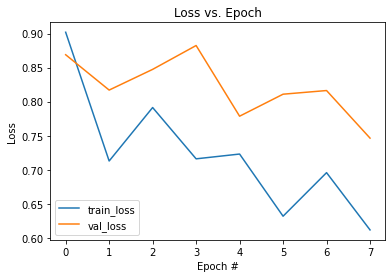

In [ ]:
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

print(history.history.keys())
'''
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
'''
plt.plot(history.history["custom_loss"], label="train_loss")
plt.plot(history.history["val_custom_loss"], label="val_loss")
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()


In [ ]:
custom_test_loss = main_model.evaluate(test_ds)
print(f'[INFO] Test Loss: {custom_test_loss}')

16/16 [==============================] - 1s 52ms/step - custom_loss: 0.7777
[INFO] Test Loss: 0.7920693755149841


In [ ]:
# Save the weights of the model for better reproducibility
main_model.encoder.save_weights("encoder.h8")
main_model.decoder.save_weights("decoder.h8")
'''
save_dir = './model_save'
encoder_prefix = os.path.join(save_dir, "encoder_weights")
decoder_prefix = os.path.join(save_dir, "decoder_weights")
encoder.load_weights(encoder_prefix)
decoder.load_weights(decoder_prefix)
'''

'\nsave_dir = \'./model_save\'\nencoder_prefix = os.path.join(save_dir, "encoder_weights")\ndecoder_prefix = os.path.join(save_dir, "decoder_weights")\nencoder.load_weights(encoder_prefix)\ndecoder.load_weights(decoder_prefix)\n'

****

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
#os.listdir(checkpoint_dir)

In [ ]:
#main_model.encoder.load_weights("encoder.h8")
#main_model.decoder.load_weights("decoder.h8")

**Inference**

In [ ]:
encoder = main_model.encoder
decoder = main_model.decoder

In [ ]:
type(encoder)

__main__.Encoder

In [ ]:
def evaluate(sentence):

  attention_plot = np.zeros((max_length_targ, max_length_inp))

  sentence = Prepare_clean_sentence(sentence)
  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs], maxlen=max_length_inp, padding='post')
  inputs = tf.convert_to_tensor(inputs)
  result = ''
  hidden = [tf.zeros((1, units))]
  enc_out, enc_hidden = encoder(inputs, hidden) 
  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, attention_weights = decoder(dec_input,dec_hidden,enc_out)

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == '<end>':
      return result, sentence, attention_plot

    dec_input = tf.expand_dims([predicted_id], 0)

  return result, sentence, attention_plot
  

In [ ]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(7,7))
  ax = fig.add_subplot(1, 1, 1)

  heatmap= ax.matshow(attention ,cmap='Greys')

  for y in range(attention.shape[0]):
        for x in range(attention.shape[1]):
            ax.text(x , y, '%.4f' % attention[y, x],
                     horizontalalignment='center',
                     verticalalignment='center', color='black')

  fig.colorbar(heatmap)

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

#  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
 # ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

In [ ]:
def translate(sentence):
  result, sentence, attention_plot = evaluate(sentence)
  
  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

  attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
  plot_attention(attention_plot, get_display(arabic_reshaper.reshape(sentence)).split(' '), result.split(' '))


In [ ]:
#checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))


In [ ]:
'''

لنجرب شيئاً!	Let's try something.

1	عليّ أن أنام.	I have to go to sleep.
2	عليّ الذهاب إلى النوم.	I have to go to sleep.
3	لازم أنام.	I have to go to sleep.
4	اليوم هو الثامن عشر من يونيو و هو عيد ميلاد مو...	Today is June 18th and it is Muiriel's birthday!
...	...	...
27894	من أين أنتِ؟ "أنا من الجزائر."	Where are you from? "I come from Algeria."
27895	لا تحزن إن الله معنا.	Do not grieve, indeed Allah is with us.
27896	لا تحزن إن الله معنا.	Don't be sad, indeed Allah is with us.
27897	محمد يحب أن يأکل ناسي ليماك.	Muhammad likes to eat nasi lemak.
27898	توم أرسل ماري إلى بوسطن.	Tom sent Mary to Boston.

'''

In [ ]:
'''
Hi.	مرحبًا.
1	Run!	اركض!
2	Help!	النجدة!
3	Jump!	اقفز!
4	Stop!	قف!
5	Go on.	داوم.
6	Go on.	استمر.
7	Hello!	مرحباً.
8	Hurry!	تعجّل!
9	Hurry!	استعجل!
10	I see.	انا اري
11	I won!	أنا فُزت!
12	Smile.	ابتسم.
13	Cheers!	في صحتك.
14	Got it?	هل فهمت؟
15	He ran.	ركض.
16	I know.	أعرف.
17	I know.	أعلم ذلك.
18	I know.	أنا أعلم
19	I'm 19.	أنا في 19
20	I'm OK.	أنا بخير.
21	Listen.	استمع
22	No way!	غير معقول!
23	Really?	حقاً؟
24	Why me?	لماذا أنا؟
25	Awesome!	رائع!
26	Call me.	هاتفني.
27	Call me.	اتصل بي.
28	Come in.	تفضل بالدخول.
29	Come in.	تعال إلى الداخل
30	Come on!	بالله عليك!
31	Come on!	هيا
32	Come on!	هيّا
33	Get out!	اخرج من هنا!
34	Get out!	أُخرج!
35	Get out.	اخرج!
36	Go away.	اتركني و شأني.
37	Go away.	اذهب بعيداً.
38	Go away.	ارحل.
39	Goodbye!	مع السلامة.
40	He came.	لقد أتى.
41	He runs.	هو يجري
42	Help me!	ساعدني!
43	Help me.	النجدة! ساعدني!
44	I'm sad.	أنا حزين.
45	Me, too.	أنا أيضاً.
46	Shut up!	اخرس!
47	Shut up!	اصمت!
48	Shut up!	اسكت!
49	Shut up!	أغلق فمك!
'''

Input: <start> help ! <end>
Predicted translation: انا كنت في المنزل . <end> 


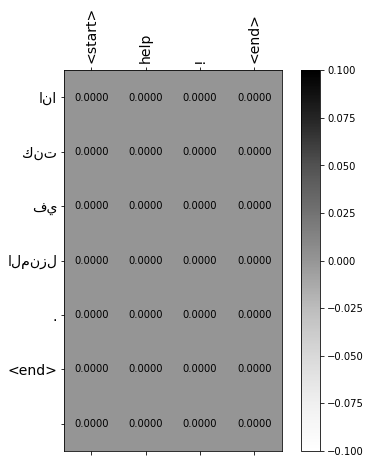

In [ ]:

translate(u" Help!")
